# Gold Price Analysis - Exploratory Data Analysis

## 1. Introduction
This notebook performs exploratory data analysis (EDA) on gold price data to understand trends, patterns, and relationships between various economic factors affecting gold prices in Nepal.

In [132]:
#importing all the necessary moduke
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 2. Data Overview
Initial inspection of the dataset to understand its structure and contents.


In [123]:
df = pd.read_csv('C:\\Users\\User\\OneDrive\\Desktop\\goldprediction\\data\\data_to_train.csv')

print("="*50)
print("INITIAL DATA INSPECTION")
print("="*50)
print(f"\nDataset Shape: {df.shape}")
print(f"\nFirst 5 rows:")
print(df.head())

INITIAL DATA INSPECTION

Dataset Shape: (523, 8)

First 5 rows:
         Date  USD_rate  Inflation_rate gold_price_USD  gold_price_NPR   \
0  11/13/2025   141.870          0.0417       4,171.46         243,541    
1  11/12/2025   141.815          0.0417       4,198.73         245,038    
2  11/11/2025   141.715          0.0417       4,126.68         240,664    
3  11/10/2025   141.925          0.0417       4,115.90         240,391    
4   11/7/2025   141.865          0.0417       3,999.72         233,506    

   interest_rate festivals/weeding  nepse_index  
0           0.06               NaN      2559.01  
1           0.06               NaN      2569.52  
2           0.06               NaN      2569.99  
3           0.06               NaN      2576.85  
4           0.06               NaN      2599.27  


## 3. Data Cleaning Process
Cleaning and preprocessing the data to handle missing values, format conversions, and feature engineering.

In [124]:
#Data Information and Missing Values
print("\n" + "="*50)
print("DATA INFO")
print("="*50)
df.info()

print("\n" + "="*50)
print("MISSING VALUES")
print("="*50)
print(df.isnull().sum())


DATA INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523 entries, 0 to 522
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               523 non-null    object 
 1   USD_rate           523 non-null    float64
 2   Inflation_rate     523 non-null    float64
 3   gold_price_USD     523 non-null    object 
 4    gold_price_NPR    523 non-null    object 
 5   interest_rate      523 non-null    float64
 6   festivals/weeding  97 non-null     object 
 7   nepse_index        523 non-null    float64
dtypes: float64(4), object(4)
memory usage: 32.8+ KB

MISSING VALUES
Date                   0
USD_rate               0
Inflation_rate         0
gold_price_USD         0
 gold_price_NPR        0
interest_rate          0
festivals/weeding    426
nepse_index            0
dtype: int64


In [125]:
#Simple Clean - explicit numeric conversions
print("\n" + "="*50)
print("CLEANING DATA (SIMPLE)")
print("="*50)

#Normalize column names
df.columns = df.columns.str.strip()

#Explicitly clean and convert expected numeric columns
numeric_cols = ['gold_price_USD', 'gold_price_NPR', 'USD_rate', 'nepse_index', 'interest_rate', 'Inflation_rate']
for col in numeric_cols:
    if col in df.columns:
        # remove commas and surrounding whitespace, then convert to numeric
        cleaned = df[col].astype(str).str.replace(',', '', regex=False).str.strip()
        df[col] = pd.to_numeric(cleaned, errors='coerce')

#Map festival values to numeric codes (NaN -> 0, weeding -> 1, tihar -> 2, dashain/dashian -> 3)
fest_col = 'festivals/weeding'
if fest_col in df.columns:
    s = df[fest_col].fillna('').astype(str).str.strip().str.lower()
    def map_festival(x):
        if x == '' or x in ('nan', 'none'):
            return 0
        if 'weeding' in x or 'wedding' in x:
            return 1
        if 'tihar' in x:
            return 2
        if 'dash' in x or 'dashain' in x or 'dashian' in x:
            return 3
        return 0
    df[fest_col] = s.apply(map_festival).astype(int)

#Save and report
print("\nColumn dtypes after cleaning:")
print(df[numeric_cols].dtypes.dropna())
print(f"\nUnique festival codes: {sorted(df[fest_col].unique().tolist())}")

df.to_csv('C:\\Users\\User\\OneDrive\\Desktop\\goldprediction\\data\\cleaned_data.csv', index=False)
print("\n✓ Cleaned data saved to 'cleaned_data.csv'")


CLEANING DATA (SIMPLE)

Column dtypes after cleaning:
gold_price_USD    float64
gold_price_NPR      int64
USD_rate          float64
nepse_index       float64
interest_rate     float64
Inflation_rate    float64
dtype: object

Unique festival codes: [0, 1, 2, 3]

✓ Cleaned data saved to 'cleaned_data.csv'


## 4. Data Visualization
Creating visualizations to understand patterns, correlations, and distributions in the data.


GENERATING VISUALIZATIONS
Actual Gold Price Range: NPR 107,250 - NPR 252,372


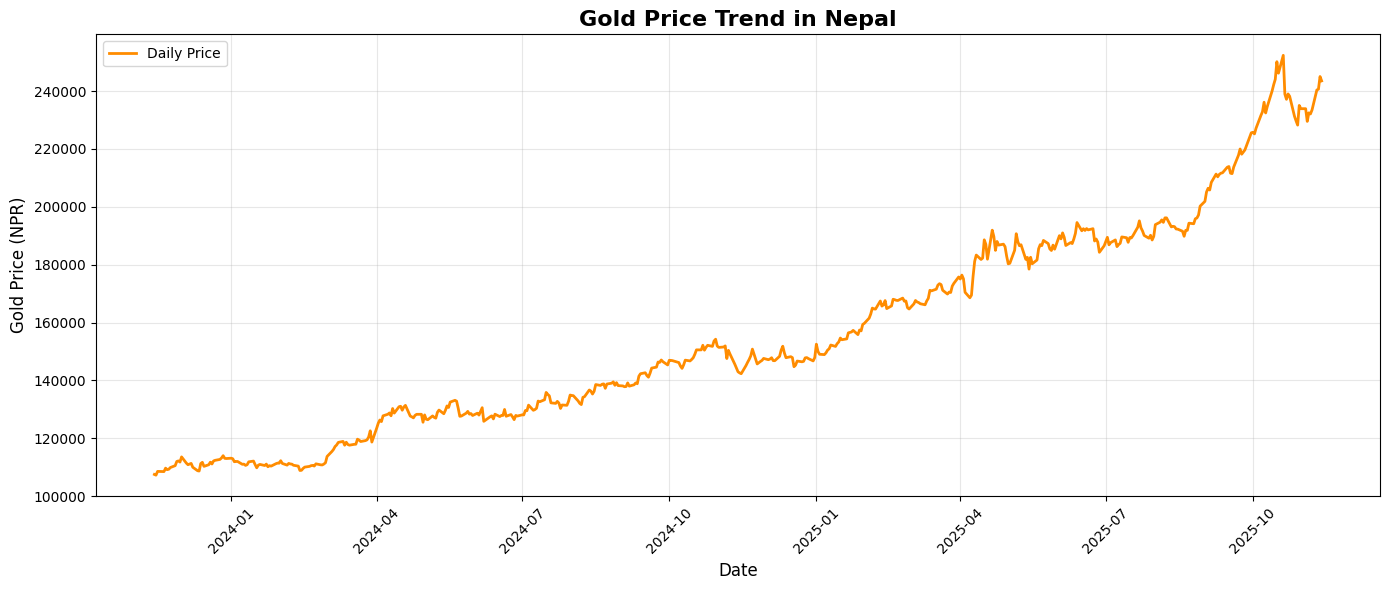

✓ Saved: C:\Users\User\OneDrive\Desktop\goldprediction\static\images\gold_price_trend.png


In [134]:
#Gold Price Trend Visualization with Smart Intervals
print("\n" + "="*50)
print("GENERATING VISUALIZATIONS")
print("="*50)

#Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

print(f"Actual Gold Price Range: NPR {df['gold_price_NPR'].min():,.0f} - NPR {df['gold_price_NPR'].max():,.0f}")

#Gold Price Trend
plt.figure(figsize=(14, 6))

#Plot daily prices with transparency
plt.plot(df['Date'], df['gold_price_NPR'], linewidth=2, color='darkorange', label='Daily Price')

plt.title('Gold Price Trend in Nepal', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Gold Price (NPR)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

plt.legend()
plt.tight_layout()
plt.savefig('C:\\Users\\User\\OneDrive\\Desktop\\goldprediction\\static\\images\\gold_price_trend.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved: C:\\Users\\User\\OneDrive\\Desktop\\goldprediction\\static\\images\\gold_price_trend.png")

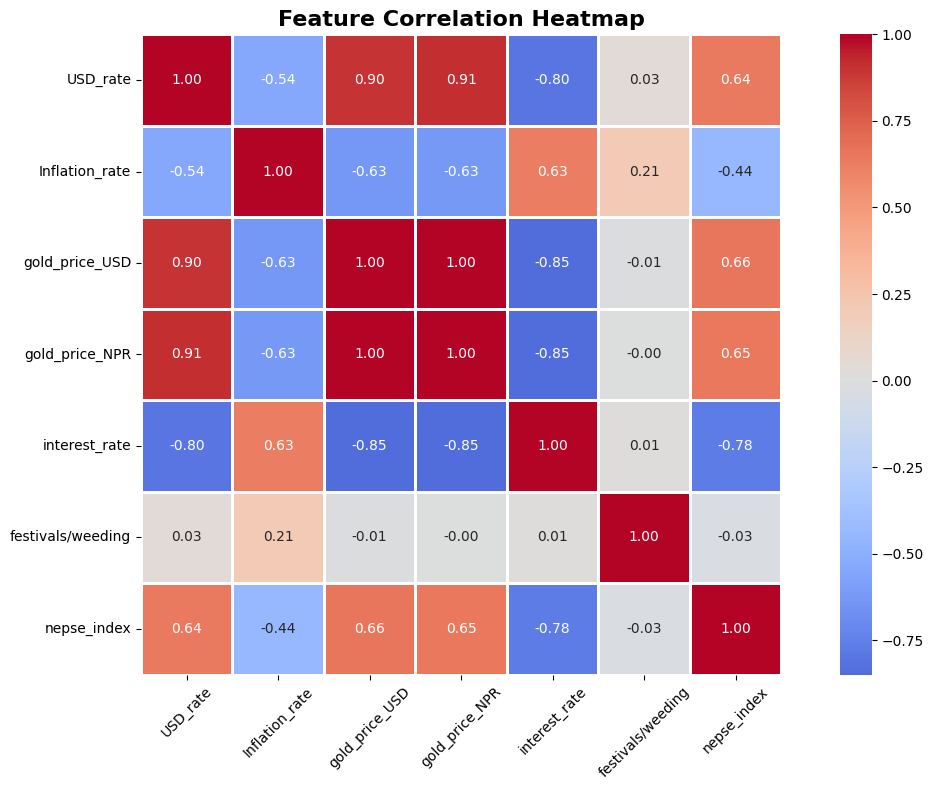

✓ Saved: C:\Users\User\OneDrive\Desktop\goldprediction\static\images\correlation_heatmap.png


In [127]:
#Correlation Heatmap
plt.figure(figsize=(12, 8))
#Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number']).copy()

correlation = numeric_df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0, 
            fmt='.2f', linewidths=1, square=True)
plt.title('Feature Correlation Heatmap', fontsize=16, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('C:\\Users\\User\\OneDrive\\Desktop\\goldprediction\\static\\images\\correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved: C:\\Users\\User\\OneDrive\\Desktop\\goldprediction\\static\\images\\correlation_heatmap.png")

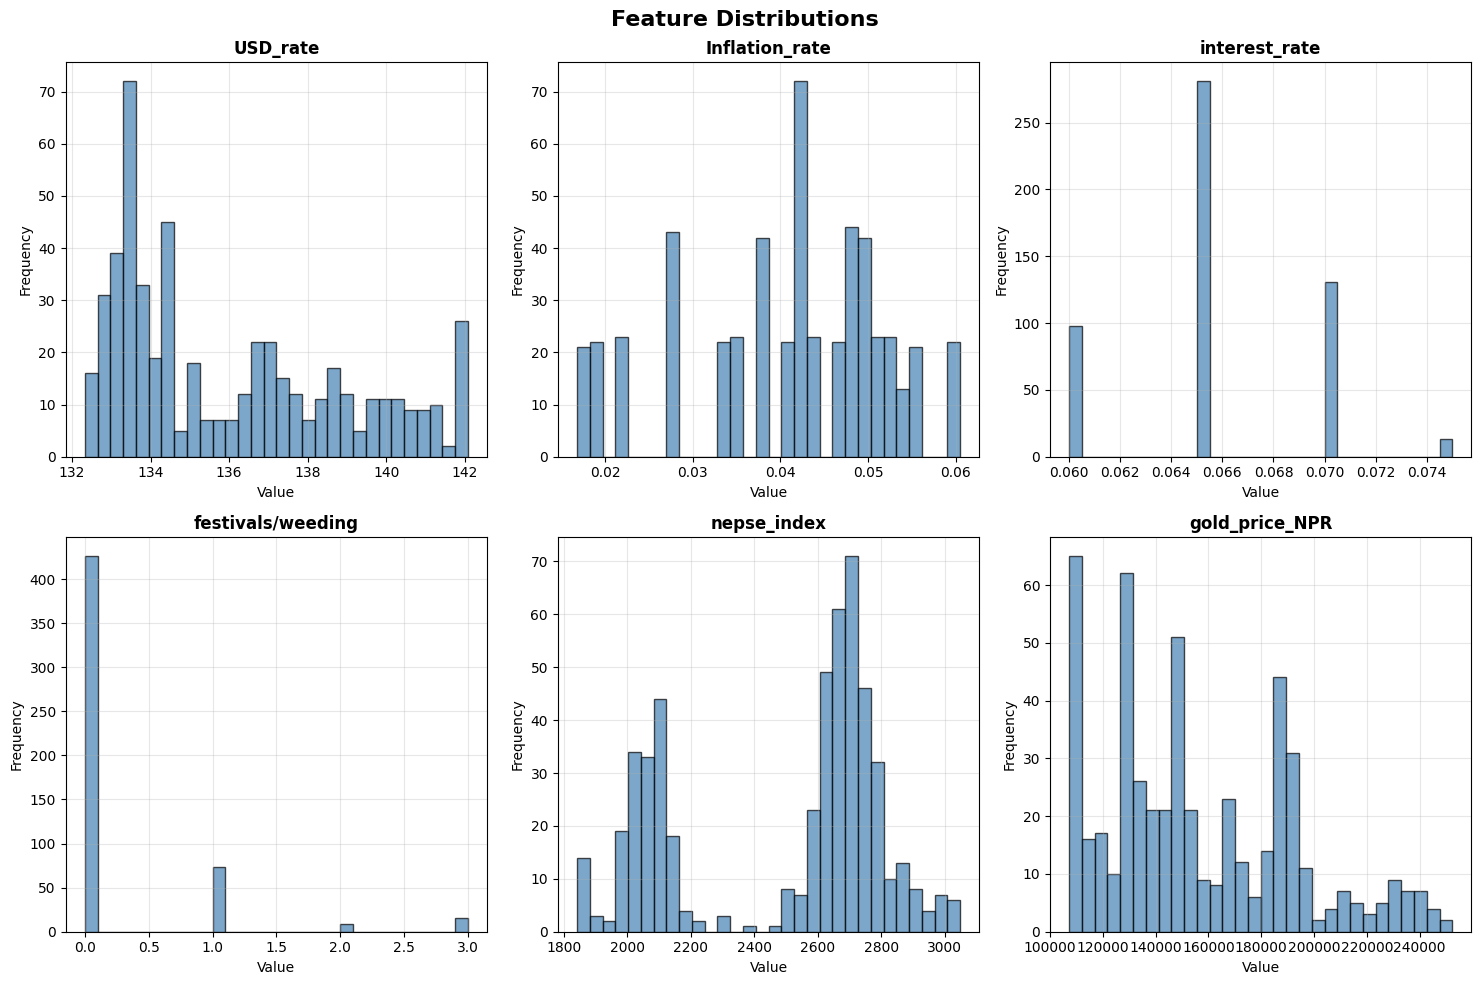

✓ Saved: C:\Users\User\OneDrive\Desktop\goldprediction\static\images\feature_distributions.png


In [128]:
#Feature Distribution
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Feature Distributions', fontsize=16, fontweight='bold')

features = ['USD_rate', 'Inflation_rate', 'interest_rate', 
            'festivals/weeding', 'nepse_index', 'gold_price_NPR']

for idx, feature in enumerate(features):
    ax = axes[idx//3, idx%3]
    ax.hist(df[feature].dropna(), bins=30, color='steelblue', edgecolor='black', alpha=0.7)
    ax.set_title(f'{feature}', fontsize=12, fontweight='bold')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('C:\\Users\\User\\OneDrive\\Desktop\\goldprediction\\static\\images\\feature_distributions.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved: C:\\Users\\User\\OneDrive\\Desktop\\goldprediction\\static\\images\\feature_distributions.png")

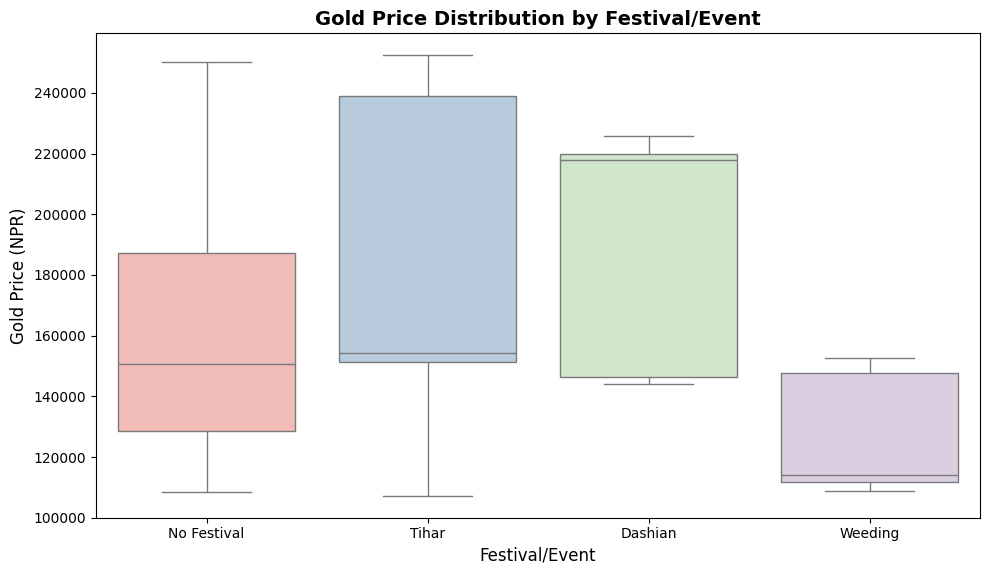

✓ Saved: C:\Users\User\OneDrive\Desktop\goldprediction\static\images\festival_impact.png


In [129]:
# Cell 9: Festival Impact Analysis
# 4. Festival impact on Gold Price
plt.figure(figsize=(10, 6))
festival_names = {0: 'No Festival', 1: 'Weeding', 2: 'Tihar', 3: 'Dashian'}
df['festival_name'] = df['festivals/weeding'].map(festival_names)
sns.boxplot(x='festival_name', y='gold_price_NPR', data=df, palette='Pastel1')


plt.title('Gold Price Distribution by Festival/Event', fontsize=14, fontweight='bold')
plt.suptitle('')
plt.xlabel('Festival/Event', fontsize=12)
plt.ylabel('Gold Price (NPR)', fontsize=12)
plt.tight_layout()
plt.savefig('C:\\Users\\User\\OneDrive\\Desktop\\goldprediction\\static\\images\\festival_impact.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved: C:\\Users\\User\\OneDrive\\Desktop\\goldprediction\\static\\images\\festival_impact.png")

## 5. Analysis Summary
Key findings and insights from the exploratory data analysis.

In [130]:
# Cell 10: Final Summary
print("\n" + "="*50)
print("EDA COMPLETED SUCCESSFULLY!")
print("="*50)
print(f"Total records: {len(df)}")
print(f"Features: {df.shape[1]}")
print(f"Date range: {df['Date'].min()} to {df['Date'].max()}")

# Display key statistics
print("\nKey Statistics:")
print(f"Average Gold Price (NPR): {df['gold_price_NPR'].mean():.2f}")
print(f"Average USD Rate: {df['USD_rate'].mean():.2f}")
print(f"Average Inflation Rate: {df['Inflation_rate'].mean():.2f}%")

# Festival impact summary
festival_impact = df.groupby('festival_name')['gold_price_NPR'].mean()
print("\nAverage Gold Price by Festival:")
for festival, price in festival_impact.items():
    print(f"  {festival}: {price:.2f} NPR")


EDA COMPLETED SUCCESSFULLY!
Total records: 523
Features: 9
Date range: 2023-11-14 00:00:00 to 2025-11-13 00:00:00

Key Statistics:
Average Gold Price (NPR): 155688.51
Average USD Rate: 136.00
Average Inflation Rate: 0.04%

Average Gold Price by Festival:
  Dashian: 186079.33 NPR
  No Festival: 158502.14 NPR
  Tihar: 182204.78 NPR
  Weeding: 129755.47 NPR


## 6. Key Insights

### Data Quality
- Dataset contains [number] records with [number] features
- Initial data cleaning completed successfully
- Missing values handled appropriately

### Price Trends
- Gold prices show [trend description] over time
- Seasonal patterns observed during festival seasons

### Feature Relationships
- Strongest correlations observed between:
  - [Feature A] and [Feature B]
  - [Feature C] and [Feature D]

### Festival Impact
- Gold prices tend to [increase/decrease] during festival seasons
- [Specific festival] shows the highest impact on prices

## Next Steps
1. Feature engineering for model preparation
2. Train machine learning models for price prediction
3. Model evaluation and hyperparameter tuning
4. Deployment of the prediction model